## 二、可视化线性关系（Visualizing linear relationships）

In [6]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))

tips = sns.load_dataset("tips")

### 1 Functions to draw linear regression models
-  These functions, regplot() and lmplot() are closely related, and share much of their core functionality.
- In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression:

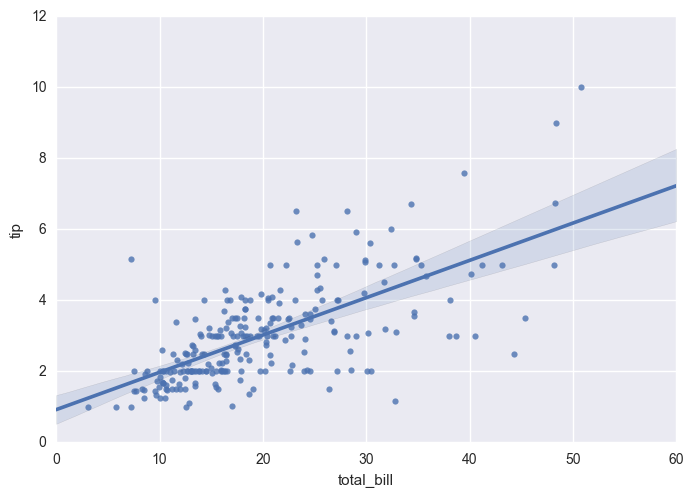

In [23]:
sns.regplot(x="total_bill", y="tip", data=tips);

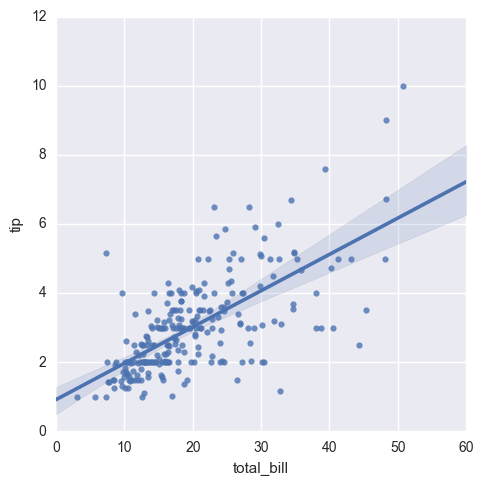

In [24]:
sns.lmplot(x="total_bill", y="tip", data=tips);

- 异同：1 上面两个图除了形状外一模一样。2 regplot()接受的数据格式比较广泛，包括simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data。3 lmplot()接受的数据格式是字符串，被称为“long-form” or “tidy” data。4 regplot()也使用lmplot()的一些子特征。

> -  You should note that the resulting plots are identical, except that the figure shapes are different. We will explain why this is shortly.
> -  For now, the other main difference to know about is that regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas Series objects, or as references to variables in a pandas DataFrame object passed to data. 
> -  In contrast, lmplot() has data as a required parameter and the x and y variables must be specified as strings. This data format is called “long-form” or “tidy” data. 
> -  Other than this input flexibility, regplot() possesses a subset of lmplot()‘s features, so we will demonstrate them using the latter.

- 当其中一个变量是离散值时，也可以绘制线性回归，但是这种简单的散点图并不典型
> -  It’s possible to fit a linear regression when one of the variables takes discrete values, however, the simple scatterplot produced by this kind of dataset is often not optimal:

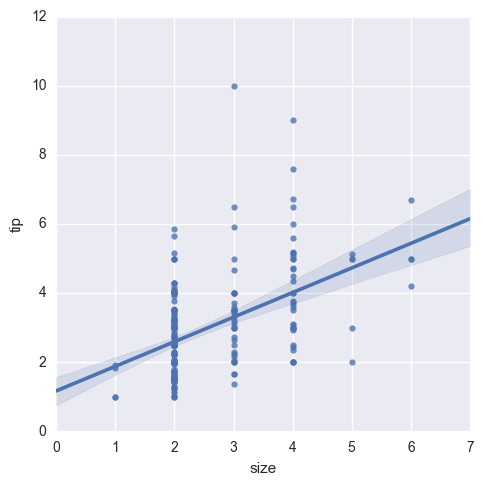

In [25]:
sns.lmplot(x="size", y="tip", data=tips);

- 一种方法是加jitter，但是仅用于散点图数据而且并不影响拟合的情况下
> -  One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. 
> -  Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

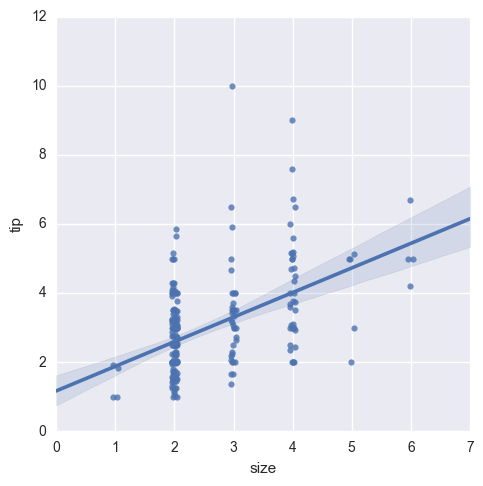

In [26]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

- 第二种方法是在离散点上聚合观测点以估计中心趋势
> -  A second option is to collapse over the observations in each discrete bin to plot an estimate of central tendency along with a confidence interval:

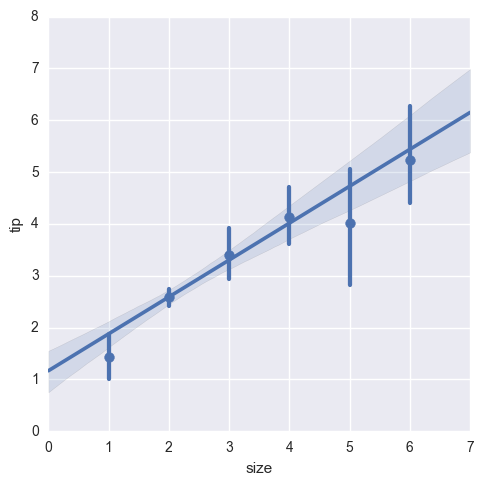

In [27]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

### 2 拟合不同种类的模型（Fitting different kinds of models）
- Anscombe’s quartet数据集
> -  The Anscombe’s quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences. 
> -  For example, in the first case, the linear regression is a good model:

In [28]:
anscombe = sns.load_dataset("anscombe")

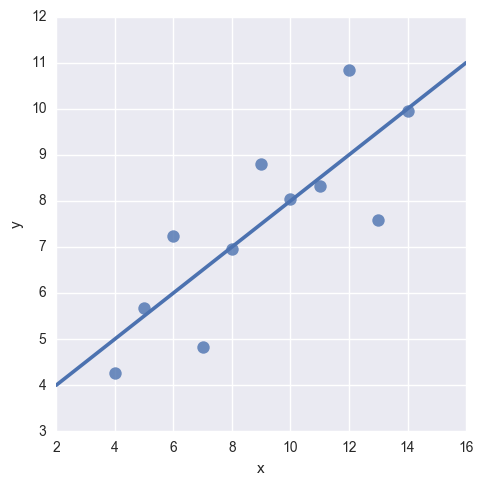

In [29]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

- 在第二个数据集中仍然是线性关系，但是线性模型拟合的并不好
> -  The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model:

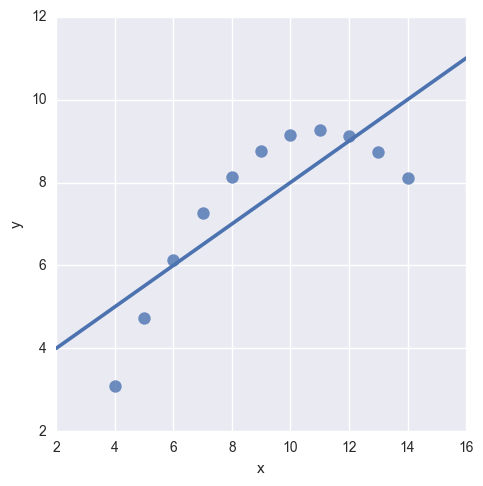

In [30]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

- lmplot() and regplot() 拟合多项式回归模型
> -  In the presence of these kind of higher-order relationships, lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset:

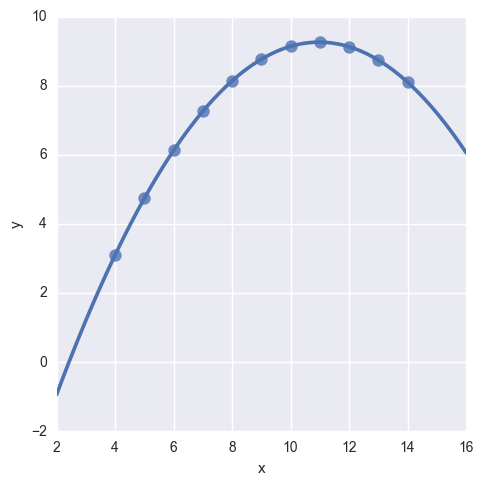

In [31]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

- 另一个问题是离群点
> -  A different problem is posed by “outlier” observations that deviate for some reason other than the main relationship under study:

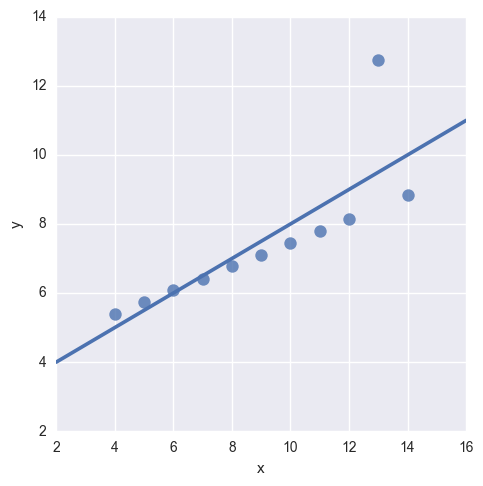

In [32]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

- 使用不同的损失函数以降低大的残差的权重
> -  In the presence of outliers, it can be useful to fit a robust regression, which uses a different loss function to downweight relatively large residuals:

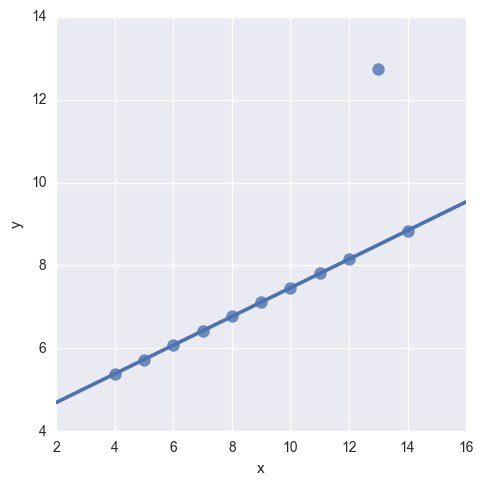

In [33]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

- 如果变量y是二元的
> -  When the y variable is binary, simple linear regression also “works” but provides implausible predictions:

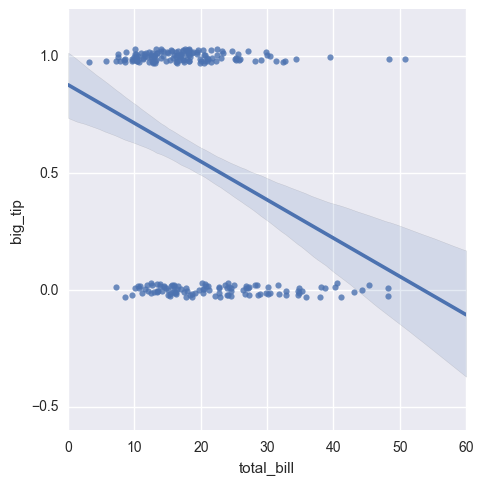

In [7]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, y_jitter=.03);

- 拟合logistic regression
- 置信区间是由bootstrap程序算出，可有ci=None去除
> -  Note that the logistic regression estimate is considerably more computationally intensive (this is true of robust regression as well) than simple regression, and as the confidence interval around the regression line is computed using a bootstrap procedure, you may wish to turn this off for faster iteration (using ci=None).

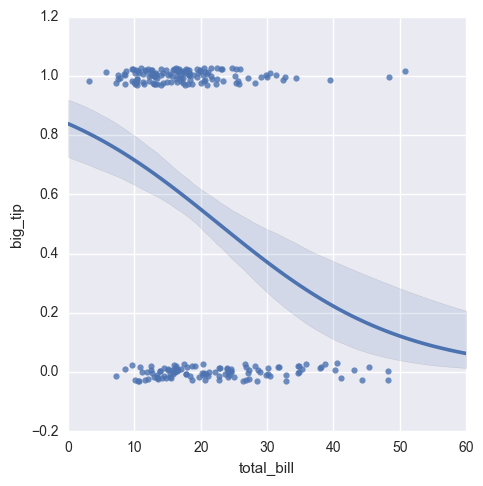

In [35]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,logistic=True, y_jitter=.03);

-  使用lowess smoother拟合非参数回归
> -  This approach has the fewest assumptions, although it is computationally intensive and so currently confidence intervals are not computed at all

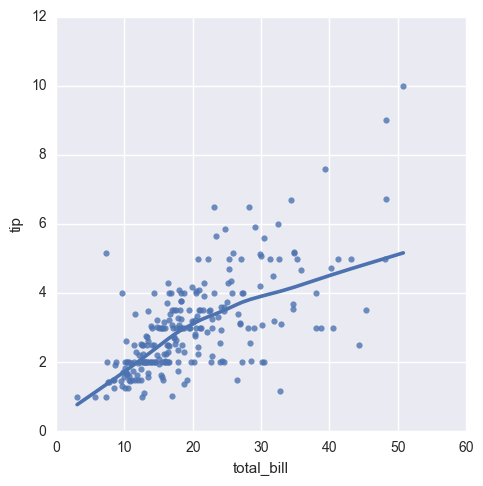

In [36]:
sns.lmplot(x="total_bill", y="tip", data=tips, lowess=True);

- residplot()函数检验简单的回归模型是否适合于数据。残差应该在y = 0附近随机。
> -  The residplot() function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. 
> -  It fits and removes a simple linear regression and then plots the residual values for each observation. 
> -  Ideally, these values should be randomly scattered around y = 0

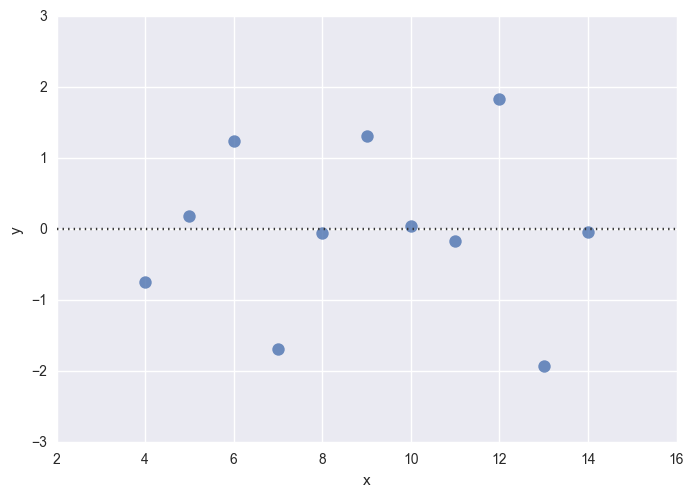

In [37]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),scatter_kws={"s": 80});

- 残差图中有规律，则简单线性回归不合适
> -  If there is structure in the residuals, it suggests that simple linear regression is not appropriate

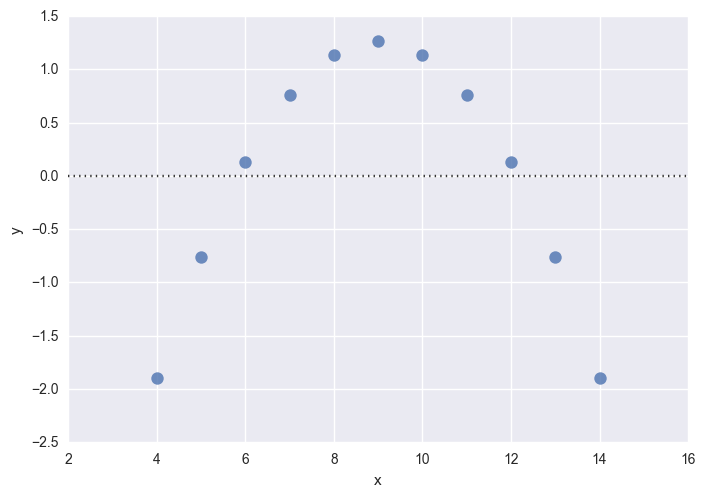

In [38]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

### 3 Conditioning on other variables
- how does the relationship between these two variables change as a function of a third variable?
- regplot() and lmplot()之间的区别。前者显示单一关系；后者可以探索三种类别变量。
> -  This is where the difference between regplot() and lmplot() appears. 
> -  While regplot() always shows a single relationsihp, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on “faceted” plots that allow you to explore interactions with up to three additional categorical variables.

- 最好的方式是在图上画出两种水平并用颜色做出区分
> -  The best way to separate out a relationship is to plot both levels on the same axes and to use color to distinguish them

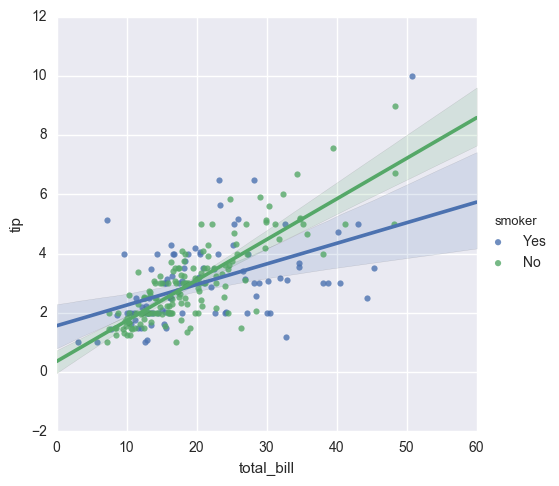

In [39]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

- 除了颜色，还可以通过散点的标记区分
> -  In addition to color, it’s possible to use different scatterplot markers to make plots the reproduce to black and white better. You also have full control over the colors used

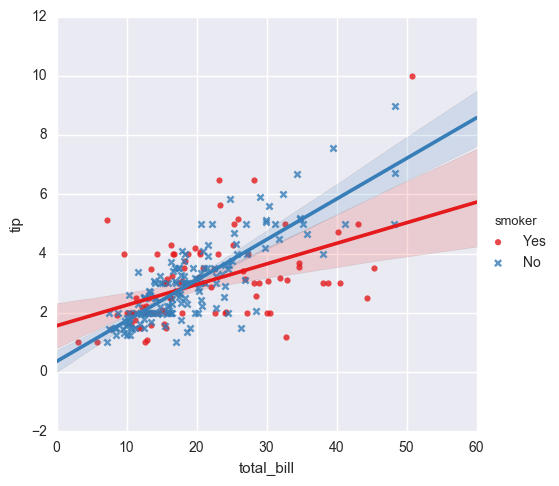

In [40]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

- 增加显示新的变量
> -  To add another variable, you can draw multiple “facets” which each level of the variable appearing in the rows or columns of the grid

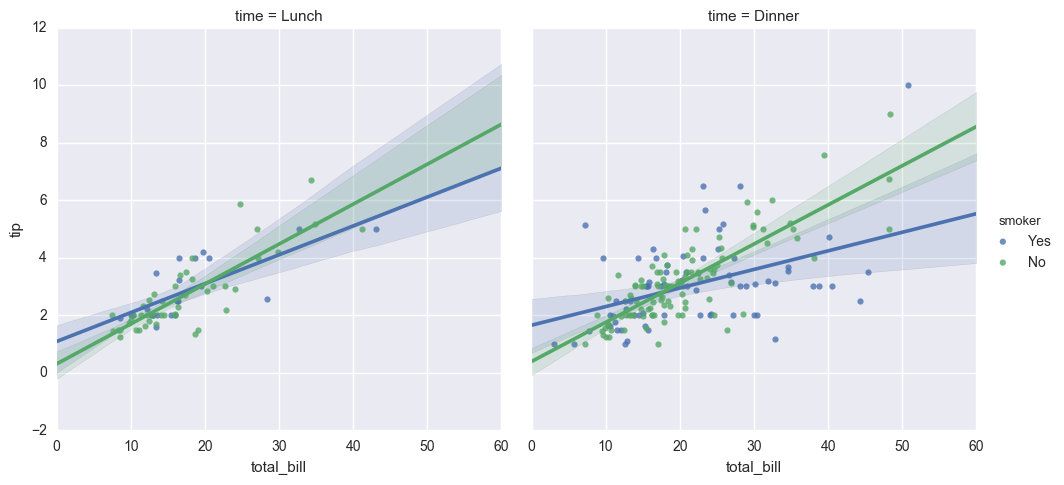

In [41]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

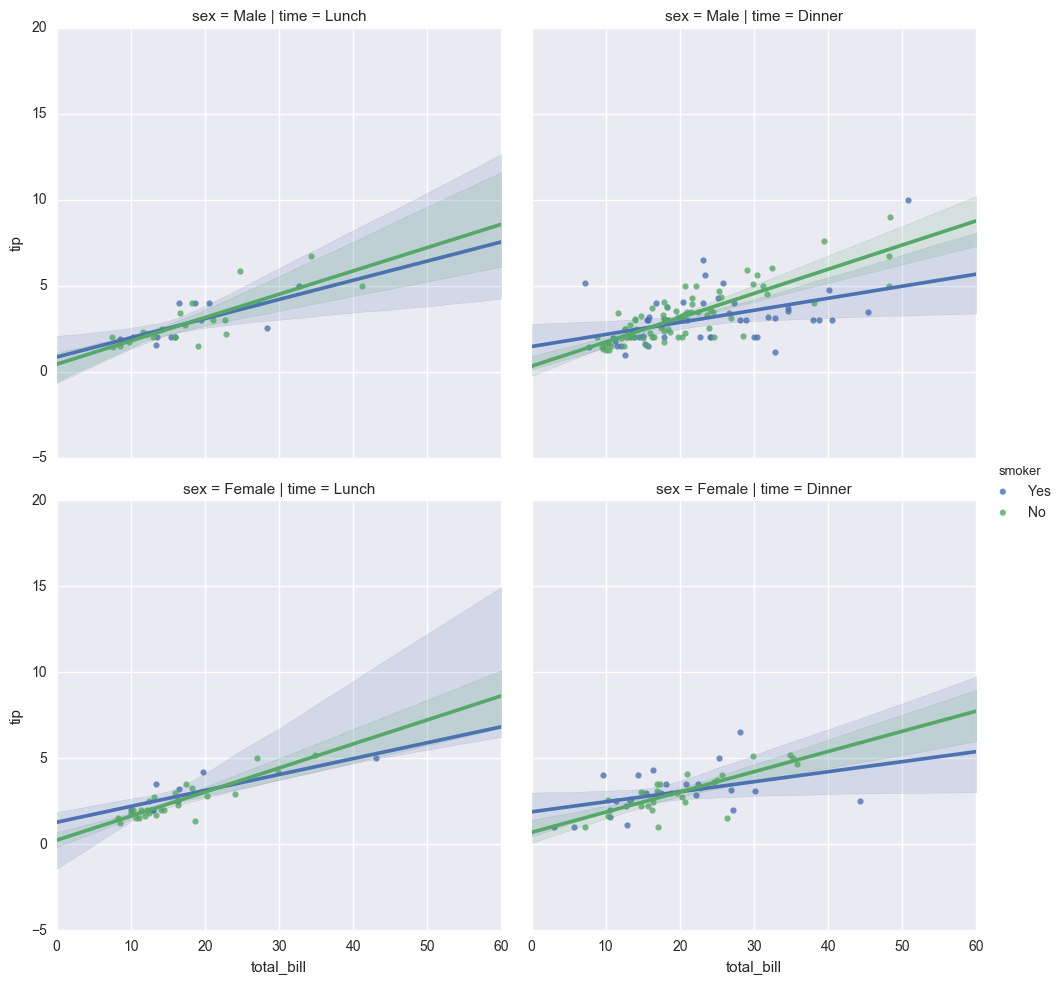

In [42]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

### 4 控制图形的大小和形状（Controlling the size and shape of the plot）
- regplot() and lmplot() 看起来一样，不过坐标轴的大小和形状不一样
> -  Before we noted that the default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. 
> -  This is because func:regplot is an “axes-level” function draws onto a specific axes. This means that you can make mutli-panel figures yourself and control exactly where the the regression plot goes. 
> -  If no axes is provided, it simply uses the “currently active” axes, which is why the default plot has the same size and shape as most other matplotlib functions. 
> -  To control the size, you need to create a figure object yourself.

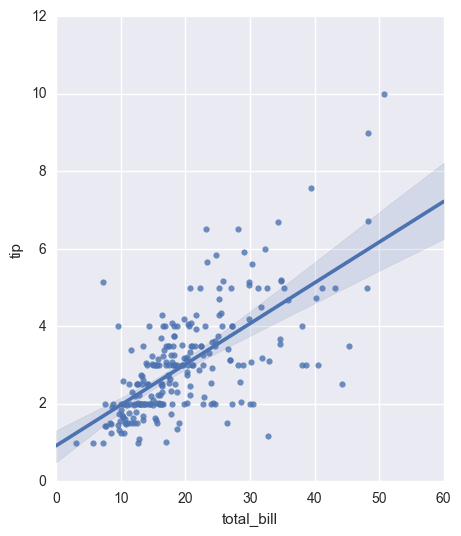

In [43]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

- lmplot()的形状和大小
> -  In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the size and aspect parameters, which apply to each facet in the plot, not to the overall figure itself

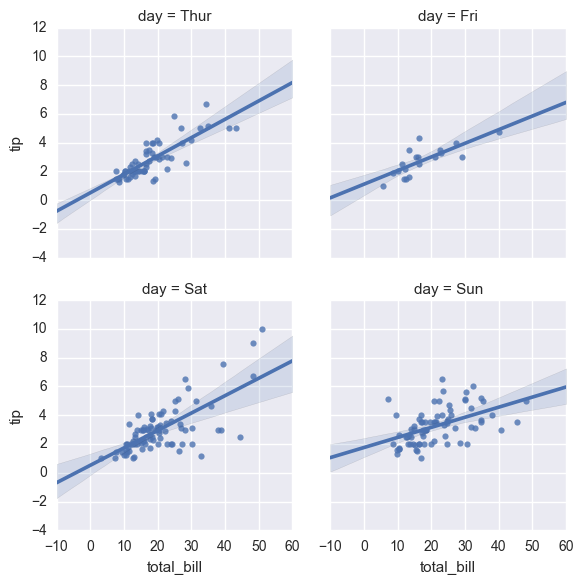

In [44]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, size=3);

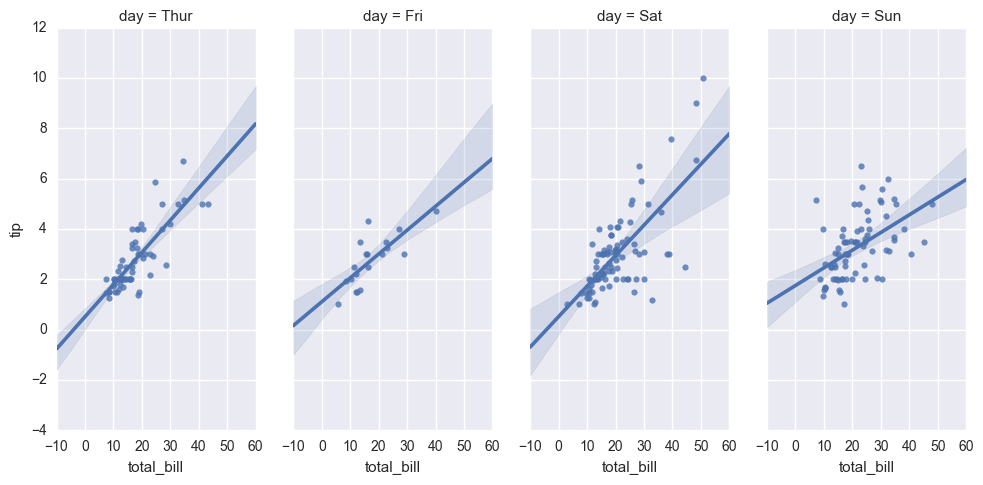

In [45]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

### 5 在其他情况下绘制回归线（Plotting a regression in other contexts）
- jointplot()通过传递参数kind="reg"调用regplot()绘制线性回归
> - A few other seaborn functions use regplot() in the context of a larger, more complex plot. 
> - The first is the jointplot() function that we introduced in the distributions tutorial. 
> - In addition to the plot styles previously discussed, jointplot() can use regplot() to show the linear regression fit on the joint axes by passing kind="reg"

D:\software\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


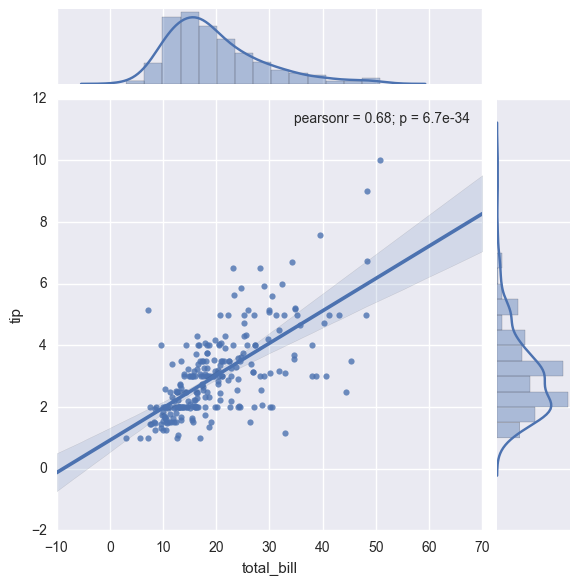

In [46]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

- pairplot() 通过参数kind="reg"结合调用regplot() and PairGrid 以显示变量间的线性关系。注意其与lmplot()的区别
> - Using the pairplot() function with kind="reg" combines regplot() and PairGrid to show the linear relationship between variables in a dataset. Take care to note how this is different from lmplot(). 
> - In the figure below, the two axes don’t show the same relationship conditioned on two levels of a third variable; rather, PairGrid() is used to show multiple relationships between different pairings of the variables in a dataset

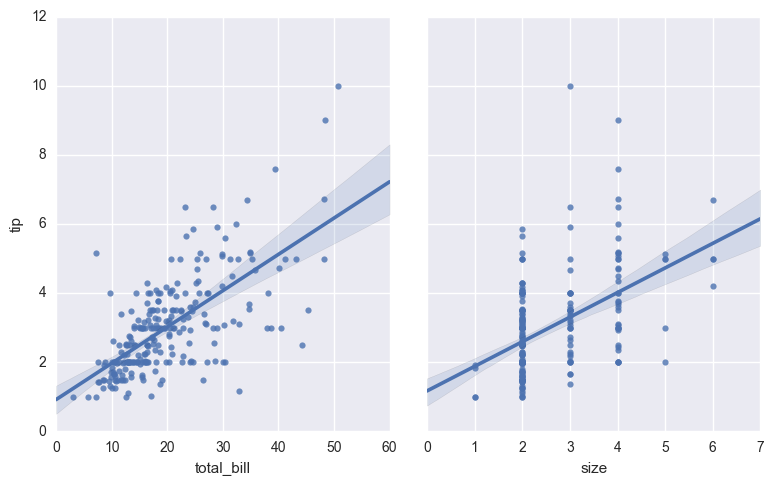

In [8]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             size=5, aspect=.8, kind="reg");

- pairplot()通过参数hue增加其他类别变量
> - Like lmplot(), but unlike jointplot(), conditioning on an additional categorical variable is built into pairplot() using the hue parameter

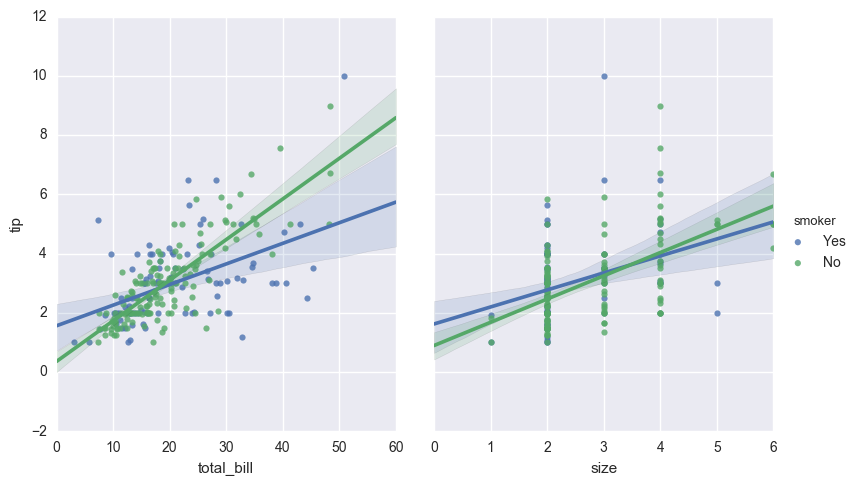

In [47]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", size=5, aspect=.8, kind="reg");